<a href="https://colab.research.google.com/github/CMU-313/spring23-nodebb-team-dj-kew/blob/e%2Fjupyter_notebook_equal_opp/P4_Jupyter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure to copy the following files from https://github.com/CMU-313/NodeBB/pull/186/files

- `career-model/requirements.txt`
- `career-model/model.pkl`
- `student_data.csv`

In [1]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Load the model and test dataset

In [2]:
import pandas as pd
import joblib
from pydantic import BaseModel, Field
from pydantic.tools import parse_obj_as

# Pydantic Models
class Student(BaseModel):
    student_id: str = Field(alias="Student ID")
    gender: str = Field(alias="Gender")
    age: str = Field(alias="Age")
    major: str = Field(alias="Major")
    gpa: str = Field(alias="GPA")
    extra_curricular: str = Field(alias="Extra Curricular")
    num_programming_languages: str = Field(alias="Num Programming Languages")
    num_past_internships: str = Field(alias="Num Past Internships")

    class Config:
        allow_population_by_field_name = True

class PredictionResult(BaseModel):
    good_employee: int


# Main Functionality
def predict(student):
    '''
    Returns a prediction on whether the student will be a good employee
    based on given parameters by using the ML model
    Parameters
    ----------
    student : dict
        A dictionary that contains all fields in Student
    
    Returns
    -------
    dict
        A dictionary satisfying type PredictionResult, contains a single field
        'good_employee' which is either 1 (will be a good employee) or 0 (will
        not be a good employee)
    '''
    # Use Pydantic to validate model fields exist
    student = parse_obj_as(Student, student)

    clf = joblib.load('./model.pkl')

    student = student.dict(by_alias=True)
    query = pd.DataFrame(student, index=[0])
    prediction = clf.predict(query) # TODO: Error handling ??

    return { 'good_employee': prediction[0] }

# Sample run
student = {
    "student_id": "student1",
    "major": "Computer Science",
    "age": "20",
    "gender": "M",
    "gpa": "4.0",
    "extra_curricular": "Men's Basketball",
    "num_programming_languages": "0",
    "num_past_internships": "0"
}
predict(student)

{'good_employee': 1}

Plot the distribution of the test dataset across all features (except Student ID) using any visualization library of your choice (e.g. pandas, matplotlib, seaborn, plotly, etc.). You should choose the appropriate visualization for each feature.

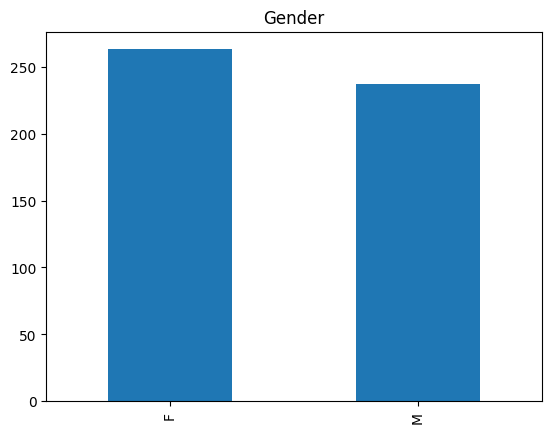

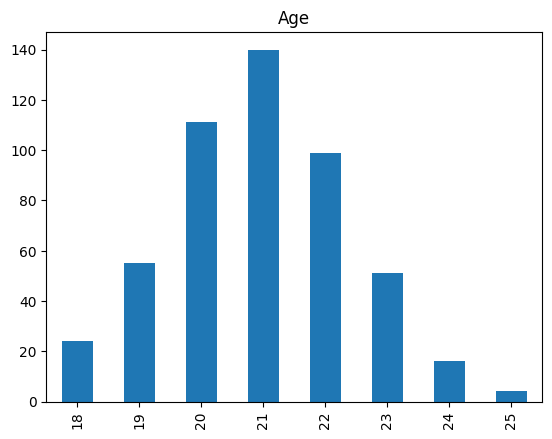

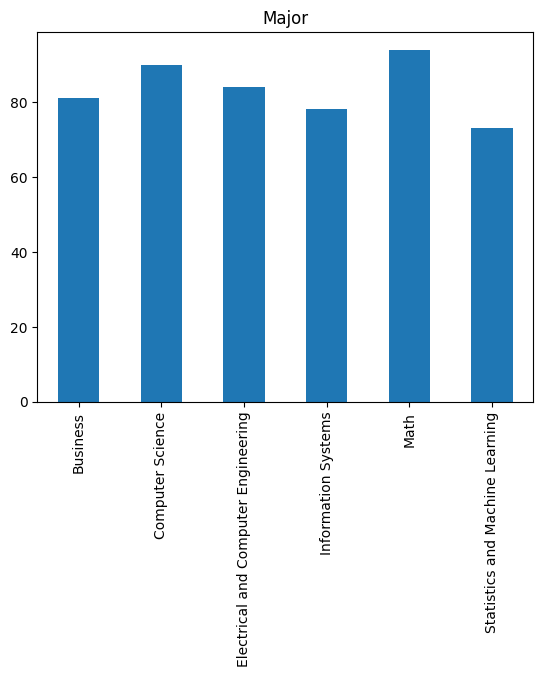

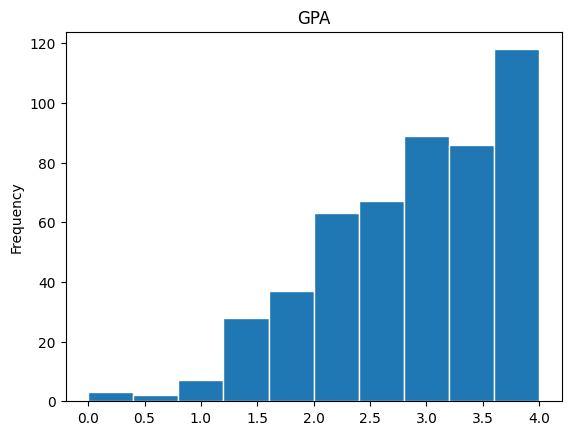

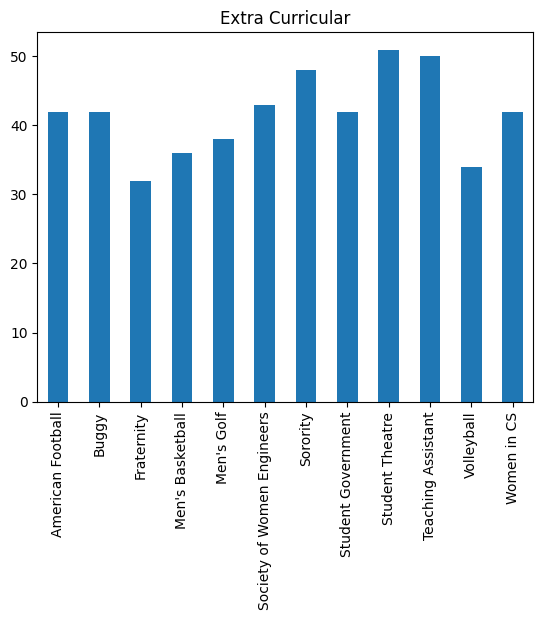

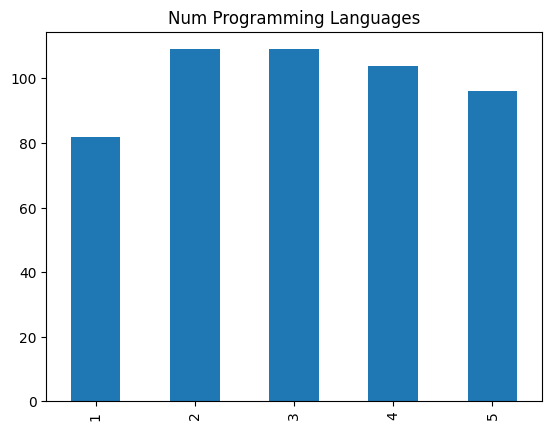

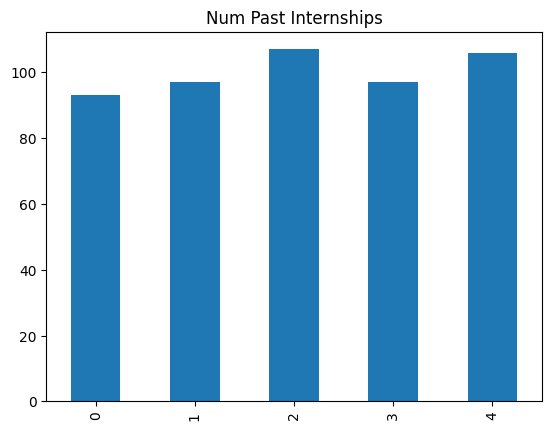

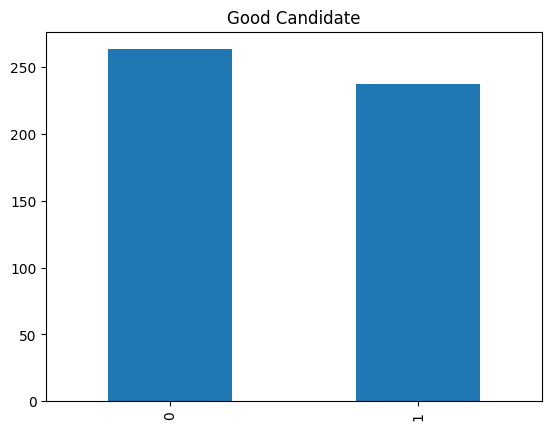

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('student_data.csv')

# Distribution of every other field
fields = ['Gender', 'Age', 'Major', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships', 'Good Candidate']
for field in fields:
  fig, ax = plt.subplots()
  if field == 'GPA':
    df[field].plot(kind='hist', edgecolor='white', title=field)
  else:
    df[field].value_counts().sort_index().plot(ax=ax, kind='bar', title=field)

Predict the output of the test dataset using the model

In [8]:
# Keep track of outputs, predicted vs actual for accuracy metrics later
predicted_outputs = []
actual_outputs = []

# Iterate over dataset and predict each student (THIS TAKES ABOUT 3 MINUTES)
for index, row in df.iterrows():
  fields = ["student_id", "major", "age", "gender", "gpa", "extra_curricular", "num_programming_languages", "num_past_internships"]
  col_names = ['Student ID', 'Major', 'Age', 'Gender', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships']

  # Construct a student object to be predicted
  student = dict()
  for i in range(len(fields)):
    curr_field = fields[i]
    curr_col = col_names[i]
    student[curr_field] = row[curr_col]

  # Get the outputs, predicted and actual
  predicted_outputs.append(predict(student)['good_employee'])
  actual_outputs.append(row['Good Candidate'])

Report the accuracy of the model, and the confusion matrix

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy score: ", accuracy_score(actual_outputs, predicted_outputs))
print("Confusion matrix: \n", confusion_matrix(actual_outputs, predicted_outputs))

Accuracy score:  0.832
Confusion matrix: 
 [[221  42]
 [ 42 195]]


Evaluate the fairness of the model through the equal opportunity approach to fairness. Evaluation is based on gender.

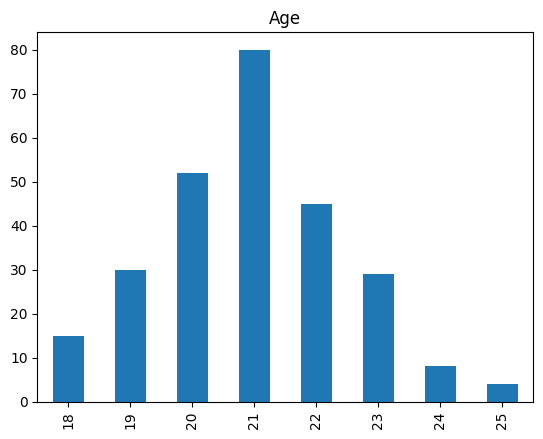

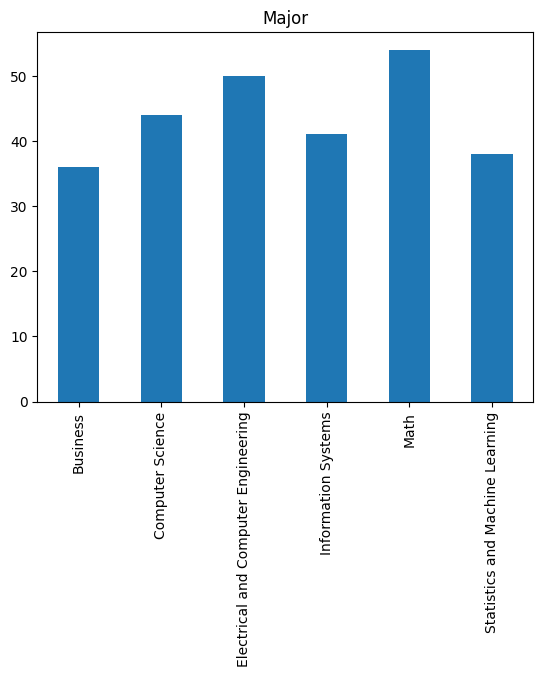

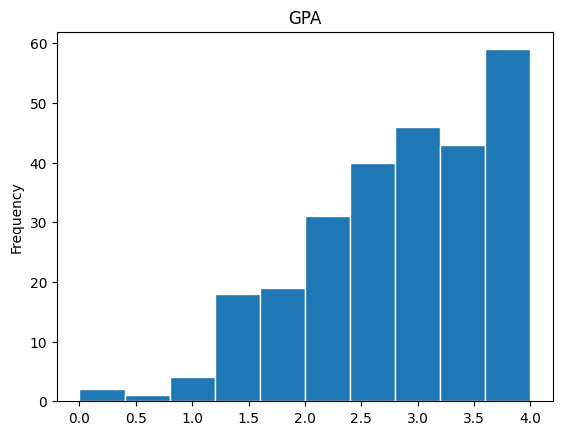

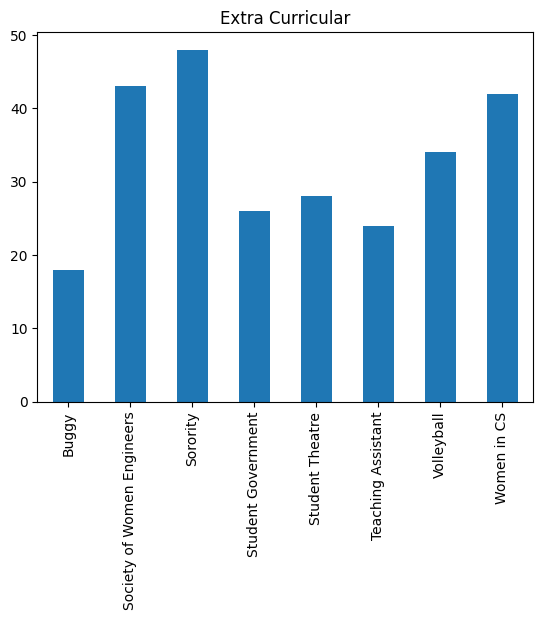

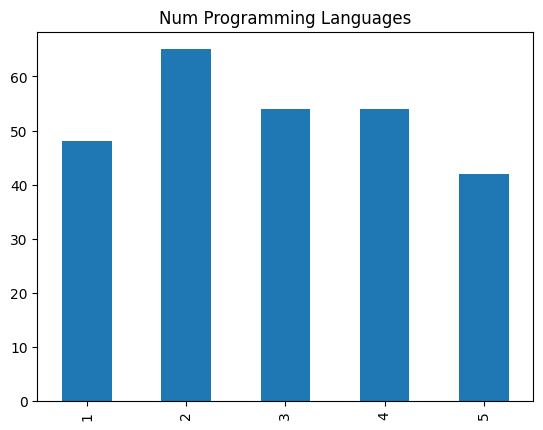

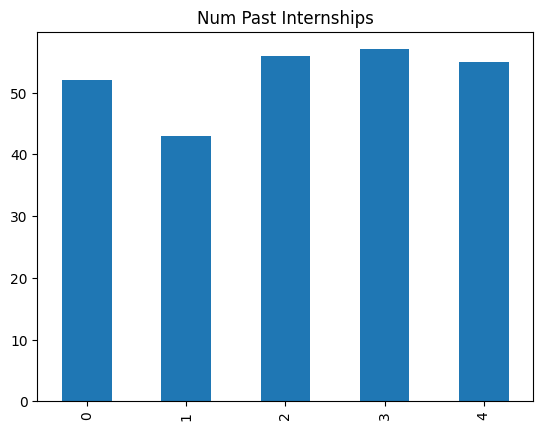

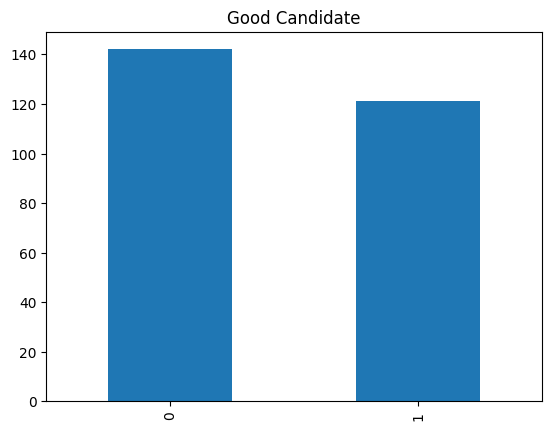

In [4]:
# Information for dataset of women

df_women = df[df.Gender != 'M']

# Distribution of every other field
fields = ['Age', 'Major', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships', 'Good Candidate']
for field in fields:
  fig, ax = plt.subplots()
  if field == 'GPA':
    df_women[field].plot(kind='hist', edgecolor='white', title=field)
  else:
    df_women[field].value_counts().sort_index().plot(ax=ax, kind='bar', title=field)

In [5]:
# Keep track of outputs, predicted vs actual for accuracy metrics later
predicted_outputs_women = []
actual_outputs_women = []

# Iterate over dataset and predict each student (THIS TAKES ABOUT 3 MINUTES)
for index, row in df_women.iterrows():
  fields = ["student_id", "major", "age", "gender", "gpa", "extra_curricular", "num_programming_languages", "num_past_internships"]
  col_names = ['Student ID', 'Major', 'Age', 'Gender', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships']

  # Construct a student object to be predicted
  student = dict()
  for i in range(len(fields)):
    curr_field = fields[i]
    curr_col = col_names[i]
    student[curr_field] = row[curr_col]

  # Get the outputs, predicted and actual
  predicted_outputs_women.append(predict(student)['good_employee'])
  actual_outputs_women.append(row['Good Candidate'])

In [10]:
print("Accuracy score: ", accuracy_score(actual_outputs_women, predicted_outputs_women))
print("Confusion matrix: \n", confusion_matrix(actual_outputs_women, predicted_outputs_women))

Accuracy score:  0.870722433460076
Confusion matrix: 
 [[140   2]
 [ 32  89]]


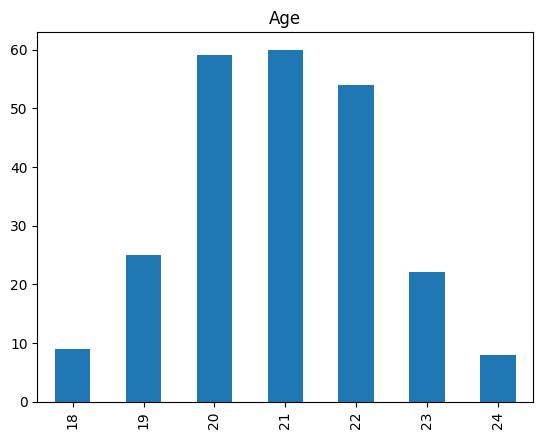

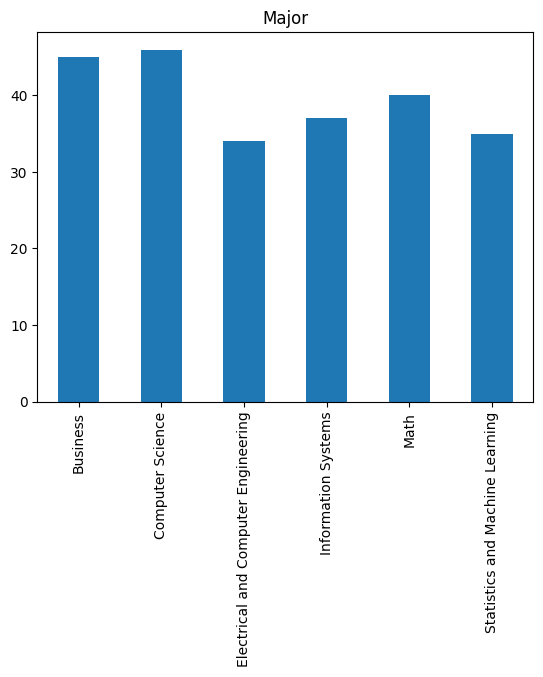

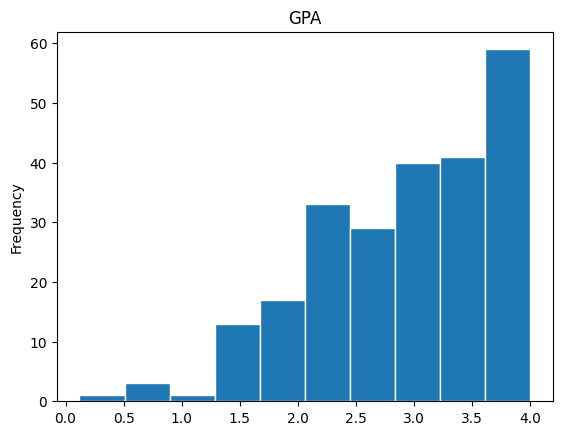

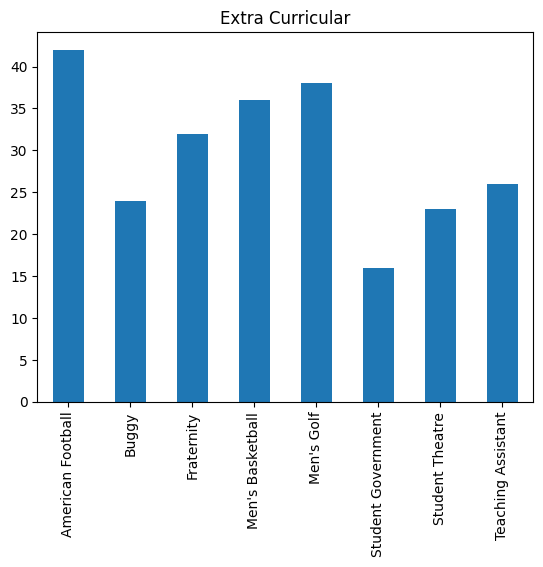

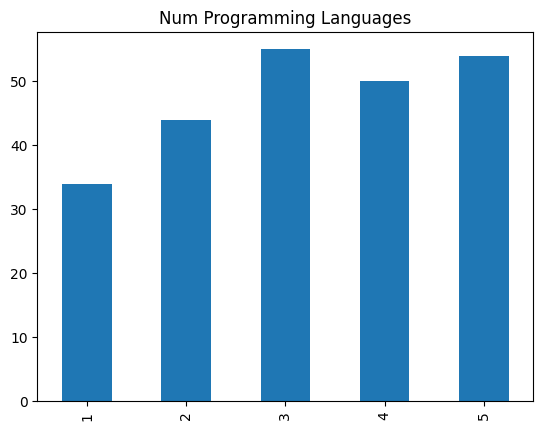

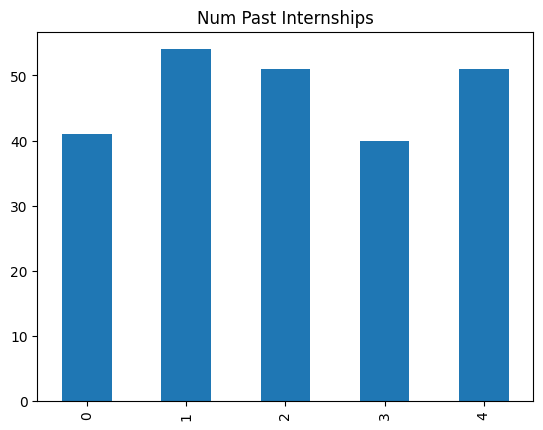

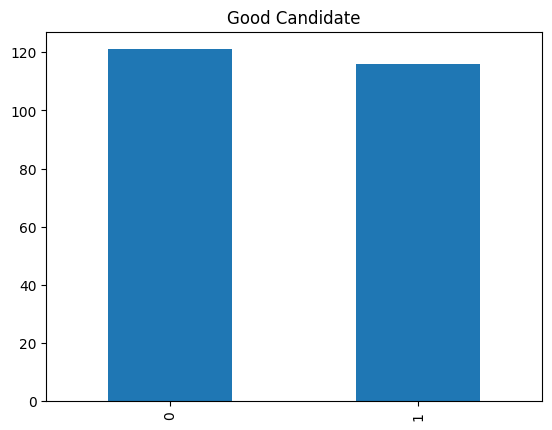

In [11]:
# Information for dataset of men

df_men = df[df.Gender != 'F']

# Distribution of every other field
fields = ['Age', 'Major', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships', 'Good Candidate']
for field in fields:
  fig, ax = plt.subplots()
  if field == 'GPA':
    df_men[field].plot(kind='hist', edgecolor='white', title=field)
  else:
    df_men[field].value_counts().sort_index().plot(ax=ax, kind='bar', title=field)

In [12]:
# Keep track of outputs, predicted vs actual for accuracy metrics later
predicted_outputs_men = []
actual_outputs_men = []

# Iterate over dataset and predict each student (THIS TAKES ABOUT 3 MINUTES)
for index, row in df_men.iterrows():
  fields = ["student_id", "major", "age", "gender", "gpa", "extra_curricular", "num_programming_languages", "num_past_internships"]
  col_names = ['Student ID', 'Major', 'Age', 'Gender', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships']

  # Construct a student object to be predicted
  student = dict()
  for i in range(len(fields)):
    curr_field = fields[i]
    curr_col = col_names[i]
    student[curr_field] = row[curr_col]

  # Get the outputs, predicted and actual
  predicted_outputs_men.append(predict(student)['good_employee'])
  actual_outputs_men.append(row['Good Candidate'])

In [14]:
print("Accuracy score: ", accuracy_score(actual_outputs_men, predicted_outputs_men))
print("Confusion matrix: \n", confusion_matrix(actual_outputs_men, predicted_outputs_men))

Accuracy score:  0.7890295358649789
Confusion matrix: 
 [[ 81  40]
 [ 10 106]]


In [15]:
# Calculate true positive rates for each gender

print("True Positive Rate for Men: ", (81/(81+10)))

print("True Positive Rate for Women: ", (140/(140+32)))

True Positive Rate for Men:  0.8901098901098901
True Positive Rate for Women:  0.813953488372093
